# Imports and Data Frame Creation

In [0]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
import seaborn as sns


In [0]:
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/diabetic-data-cleaning.zip', compression='zip')

# '?' Entered into Data

In [0]:
for col in df.describe().columns:
    nanidx = df[col].sample(frac=np.random.uniform(0.0, 0.001)).index
    df.loc[nanidx, col] = '?'

# Understanding the Data

In [0]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [0]:
df.describe()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,101668,71474,6,3,10,10,9,27,18,15,18,73,119,8,76,40,34,22,717,749,790,17,4,4,4,4,4,4,4,2,4,4,2,4,4,4,4,2,3,1,1,4,4,2,2,2,2,2,2,3
top,?,?,Caucasian,Female,[70-80),?,1,1,7,3,?,?,1,0,13,0,0,0,428,276,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
freq,99,100,76099,54708,26068,98569,53984,60196,57440,17743,40256,49949,3202,46618,6082,85009,90331,67607,6862,6752,11555,49435,96420,84748,81778,100227,101063,101680,96575,101765,89080,91116,101743,94438,95401,101458,101728,101763,101727,101766,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null object
patient_nbr                 101766 non-null object
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null object
discharge_disposition_id    101766 non-null object
admission_source_id         101766 non-null object
time_in_hospital            101766 non-null object
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null object
num_procedures              101766 non-null object
num_medications             101766 non-null object
number_outpatient           101766 non-null object
number_emergency            101766 non-null object
number_inpatient      

In [0]:
df.weight.value_counts()

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [0]:
for col in list(df.columns):
    print(df.loc[df[col] == '?'])

      encounter_id patient_nbr             race  ... change diabetesMed readmitted
3038             ?    69952815                ?  ...     No         Yes         NO
3953             ?    25586127        Caucasian  ...     No         Yes         NO
5566             ?     2091330        Caucasian  ...     Ch         Yes        >30
7377             ?    18142569        Caucasian  ...     No         Yes         NO
8178             ?     1527300  AfricanAmerican  ...     No         Yes        >30
...            ...         ...              ...  ...    ...         ...        ...
96710            ?    41388822        Caucasian  ...     No         Yes         NO
96952            ?    88372575        Caucasian  ...     No         Yes        <30
97611            ?    84583692        Caucasian  ...     Ch         Yes        >30
98425            ?   176258309        Caucasian  ...     Ch         Yes         NO
98670            ?   116848508        Caucasian  ...     No         Yes        >30

[99

In [0]:
list(df.columns)

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

# Replace '?' with NaN

In [0]:
df2 = df.replace('?', np.nan)

# Convert Objects to Floats

In [0]:
df2 = df2.astype({'time_in_hospital': 'float', 'num_lab_procedures': 'float', 'num_procedures': 'float',
                  'num_medications': 'float', 'number_outpatient': 'float', 'number_emergency': 'float',
                 'number_inpatient': 'float'}, copy = False)

In [0]:
df2.isnull().sum()*100/df2.isnull().count()

encounter_id                 0.097282
patient_nbr                  0.098265
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.012774
discharge_disposition_id     0.056993
admission_source_id          0.091386
time_in_hospital             0.067803
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.088438
num_procedures               0.091386
num_medications              0.050115
number_outpatient            0.021618
number_emergency             0.057976
number_inpatient             0.032427
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.086473
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

In [0]:
df2.weight.value_counts()

[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: weight, dtype: int64

In [0]:
df2 = df2.drop(columns = ['weight', 'payer_code', 'medical_specialty', 'encounter_id', 'patient_nbr'])

In [0]:
df2.head(10)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,41.0,0.0,1.0,0.0,0.0,0.0,250.83,NaN,NaN,1.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1.0,1.0,7.0,3.0,59.0,0.0,18.0,0.0,0.0,0.0,276,250.01,255,9.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,2.0,11.0,5.0,13.0,2.0,0.0,1.0,648,250,V27,6.0,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1.0,1.0,7.0,2.0,44.0,1.0,16.0,0.0,0.0,0.0,8,250.43,403,7.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1.0,1.0,7.0,1.0,51.0,0.0,8.0,0.0,0.0,0.0,197,157,250,5.0,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,[50-60),2.0,1.0,2.0,3.0,31.0,6.0,16.0,0.0,0.0,0.0,414,411,250,9.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
6,Caucasian,Male,[60-70),3.0,1.0,2.0,4.0,70.0,1.0,21.0,0.0,0.0,0.0,414,411,V45,7.0,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,Caucasian,Male,[70-80),1.0,1.0,7.0,5.0,73.0,0.0,12.0,0.0,0.0,0.0,428,492,250,8.0,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,Caucasian,Female,[80-90),2.0,1.0,4.0,13.0,68.0,2.0,28.0,0.0,0.0,0.0,398,427,38,8.0,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,Caucasian,Female,[90-100),3.0,3.0,4.0,12.0,33.0,3.0,18.0,0.0,0.0,0.0,434,198,486,8.0,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [0]:
df3 = df2.loc[:,['time_in_hospital','num_lab_procedures','num_procedures', 'number_outpatient', 'number_emergency', 'number_inpatient']]


# Fill NaN with Column Mean

In [0]:
df3 = df2.fillna(df2.mean())
df3.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,41.0,0.0,1.0,0.0,0.0,0.0,250.83,NaN,NaN,1.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1.0,1.0,7.0,3.0,59.0,0.0,18.0,0.0,0.0,0.0,276,250.01,255,9.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,2.0,11.0,5.0,13.0,2.0,0.0,1.0,648,250,V27,6.0,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1.0,1.0,7.0,2.0,44.0,1.0,16.0,0.0,0.0,0.0,8,250.43,403,7.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1.0,1.0,7.0,1.0,51.0,0.0,8.0,0.0,0.0,0.0,197,157,250,5.0,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Visualizing Outliers

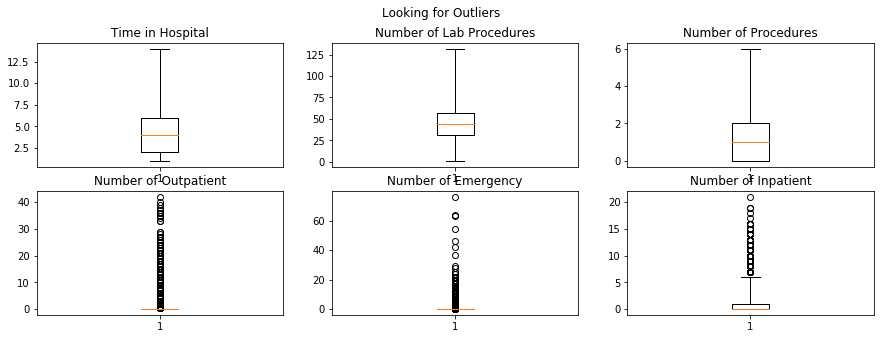

In [0]:
plt.figure(figsize = (15,5)) 

plt.subplot(2,3,1)
plt.boxplot(df3['time_in_hospital'], whis = 5)
plt.title('Time in Hospital')

plt.subplot(2,3,2)
plt.boxplot(df3['num_lab_procedures'], whis = 5)
plt.title('Number of Lab Procedures')

plt.subplot(2,3,3)
plt.boxplot(df3['num_procedures'], whis = 5)
plt.title('Number of Procedures')

plt.subplot(2,3,4)
plt.boxplot(df3['number_outpatient'], whis = 5)
plt.title('Number of Outpatient')

plt.subplot(2,3,5)
plt.boxplot(df3['number_emergency'], whis = 5)
plt.title('Number of Emergency')

plt.subplot(2,3,6)
plt.boxplot(df3['number_inpatient'], whis = 5)
plt.title('Number of Inpatient')

plt.suptitle('Looking for Outliers')
plt.show()

# Winsorizing Outliers

In [0]:
winsorized_number_outpatient = winsorize(df3['number_outpatient'], (0, .05))
winsorized_number_emergency = winsorize(df3['number_emergency'], (0, .05))
winsorized_number_inpatient = winsorize(df3['number_inpatient'], (0, .05))

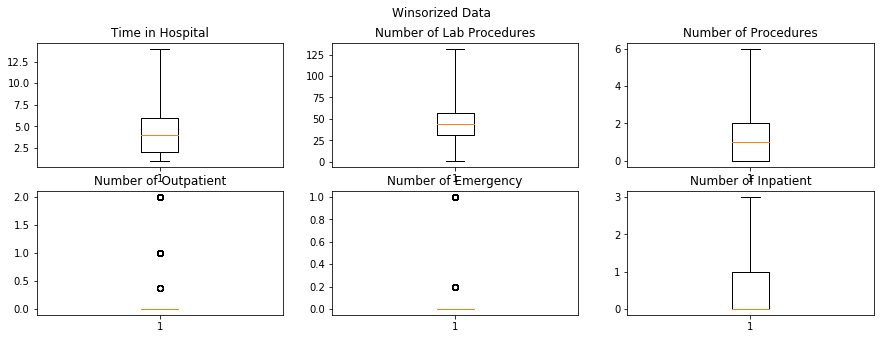

In [0]:
plt.figure(figsize = (15,5)) 

plt.subplot(2,3,1)
plt.boxplot(df3['time_in_hospital'], whis = 5)
plt.title('Time in Hospital')

plt.subplot(2,3,2)
plt.boxplot(df3['num_lab_procedures'], whis = 5)
plt.title('Number of Lab Procedures')

plt.subplot(2,3,3)
plt.boxplot(df3['num_procedures'], whis = 5)
plt.title('Number of Procedures')

plt.subplot(2,3,4)
plt.boxplot(winsorized_number_outpatient, whis = 5)
plt.title('Number of Outpatient')

plt.subplot(2,3,5)
plt.boxplot(winsorized_number_emergency, whis = 5)
plt.title('Number of Emergency')

plt.subplot(2,3,6)
plt.boxplot(winsorized_number_inpatient, whis = 5)
plt.title('Number of Inpatient')

plt.suptitle('Winsorized Data')
plt.show()

# Create df for numeric values

In [0]:
df_cat = df2.drop(columns = ['time_in_hospital','num_lab_procedures','num_procedures', 'number_outpatient', 'number_emergency', 'number_inpatient'])

In [0]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 39 columns):
race                        99493 non-null object
gender                      101766 non-null object
age                         101766 non-null object
admission_type_id           101753 non-null float64
discharge_disposition_id    101708 non-null float64
admission_source_id         101673 non-null float64
num_medications             101715 non-null float64
diag_1                      101745 non-null object
diag_2                      101408 non-null object
diag_3                      100343 non-null object
number_diagnoses            101678 non-null float64
max_glu_serum               101766 non-null object
A1Cresult                   101766 non-null object
metformin                   101766 non-null object
repaglinide                 101766 non-null object
nateglinide                 101766 non-null object
chlorpropamide              101766 non-null object
glimepiride       

In [0]:
for col in df_cat[df_cat.describe().columns]:
    mode = df_cat[col].mode()
    df_cat[col] = df_cat[col].fillna(mode)

In [0]:
df_cat.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,250.83,NaN,NaN,1.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1.0,1.0,7.0,18.0,276,250.01,255,9.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,13.0,648,250,V27,6.0,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1.0,1.0,7.0,16.0,8,250.43,403,7.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1.0,1.0,7.0,8.0,197,157,250,5.0,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Try using multiple methods on the same data. How do your results differ depending on the order you do them?

1) It makes sense to use mean for imputation of numeric values

2) Depending on the categorical values, we could use mode for imputation

3) Separate the data in multiple dataframes based on numberical and categorical data then use the appropriate method for cleaning the data and then imputating the cleaned data. Finally, we can concantenate the cleaned dataframes into one dataframe and perform the respective analysis.

## Create Binary Column for Readmission 

In [0]:
df_cat['readmitted_binary'] = df_cat['readmitted'].apply(lambda x: 0 if x=='NO' else 1)

In [0]:
df_cat.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_binary
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,250.83,NaN,NaN,1.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0
1,Caucasian,Female,[10-20),1.0,1.0,7.0,18.0,276,250.01,255,9.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,1
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,13.0,648,250,V27,6.0,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,0
3,Caucasian,Male,[30-40),1.0,1.0,7.0,16.0,8,250.43,403,7.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,0
4,Caucasian,Male,[40-50),1.0,1.0,7.0,8.0,197,157,250,5.0,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,0


## Determine Relationship between Race and Readmission

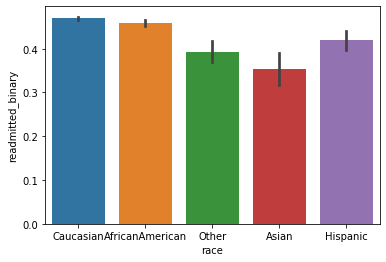

In [0]:
sns.barplot(x= 'race', y ='readmitted_binary', data = df_cat)

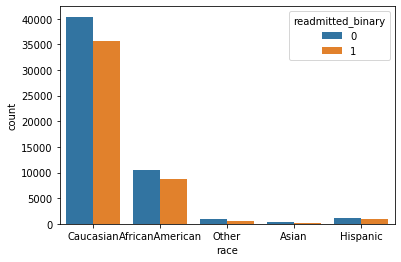

In [0]:
sns.countplot('race', hue = 'readmitted_binary', data = df_cat)

In [0]:
count_table = pd.crosstab(df_cat['readmitted_binary'], df_cat['race'])
count_table

race,AfricanAmerican,Asian,Caucasian,Hispanic,Other
readmitted_binary,,,,,
0,10421,415,40383,1183,915
1,8789,226,35716,854,591


In [0]:
stats.chisquare(count_table, axis = None)

Power_divergenceResult(statistic=211664.74165016637, pvalue=0.0)

In [0]:
type(count_table)

pandas.core.frame.DataFrame

**Conclusion:** Race has an impact on readmission rates

## Determine Relationship between Gender and Readmission

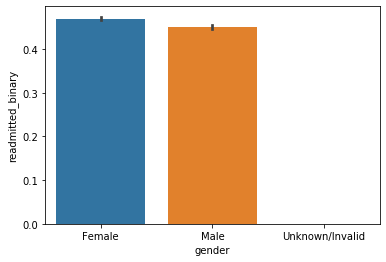

In [0]:
sns.barplot(x= 'gender', y ='readmitted_binary', data = df_cat)

In [0]:
count_table1 = pd.crosstab(df_cat['readmitted_binary'], df_cat['gender'])
count_table1

gender,Female,Male,Unknown/Invalid
readmitted_binary,,,
0,29038,25823,3
1,25670,21232,0


In [0]:
stats.chisquare(count_table1, axis = None)

Power_divergenceResult(statistic=52693.023996226635, pvalue=0.0)

**Conclusion:** Gender has an impact on readmission rates

## Determine Relationship between Insulin and Readmission

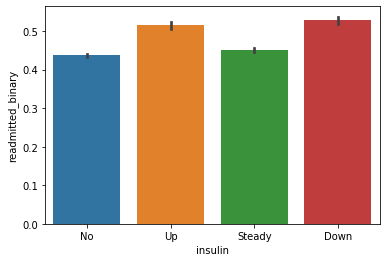

In [0]:
sns.barplot(x= 'insulin', y ='readmitted_binary', data = df_cat)

In [0]:
count_table2 = pd.crosstab(df_cat['readmitted_binary'], df_cat['insulin'])
count_table2

insulin,Down,No,Steady,Up
readmitted_binary,,,,
0,5768,26678,16934,5484
1,6450,20705,13915,5832


In [0]:
stats.chisquare(count_table2, axis = None)

Power_divergenceResult(statistic=36571.68402020321, pvalue=0.0)

## Adding Readmitted Binary into DF2

In [0]:
df2['readmitted_binary'] = df2['readmitted'].apply(lambda x: 0 if x=='NO' else 1)

## Determine Relationship between Time in Hospital and Readmission

(array([31411., 17743., 13918., 17492.,  5855.,  4384.,  5342.,  1853.,
         1448.,  2251.]),
 array([ 1. ,  2.3,  3.6,  4.9,  6.2,  7.5,  8.8, 10.1, 11.4, 12.7, 14. ]),
 <a list of 10 Patch objects>)

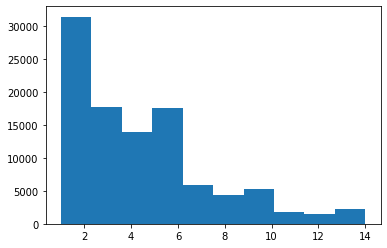

In [0]:
plt.hist(df2['time_in_hospital'])

In [0]:
admitted_time = df2.loc[df2['readmitted_binary']==0, 'time_in_hospital'] 
not_admitted_time = df2.loc[df2['readmitted_binary']==1, 'time_in_hospital']

In [0]:
age_list=df2['age'].unique()

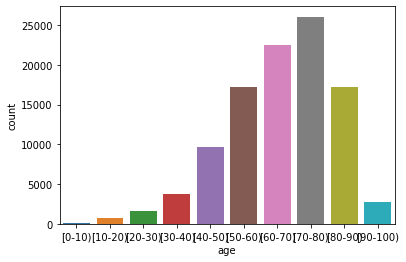

In [0]:
sns.countplot(df2['age'])

In [0]:
age_dic={}
for i in range(len(age_list)):
    age_dic[age_list[i]]=i


df2['age_rank'] = df['age'].map(age_dic)

In [0]:
df2.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_binary,age_rank
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,41.0,0.0,1.0,0.0,0.0,0.0,250.83,NaN,NaN,1.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0,0
1,Caucasian,Female,[10-20),1.0,1.0,7.0,3.0,59.0,0.0,18.0,0.0,0.0,0.0,276,250.01,255,9.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,1,1
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,2.0,11.0,5.0,13.0,2.0,0.0,1.0,648,250,V27,6.0,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,0,2
3,Caucasian,Male,[30-40),1.0,1.0,7.0,2.0,44.0,1.0,16.0,0.0,0.0,0.0,8,250.43,403,7.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,0,3
4,Caucasian,Male,[40-50),1.0,1.0,7.0,1.0,51.0,0.0,8.0,0.0,0.0,0.0,197,157,250,5.0,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,0,4


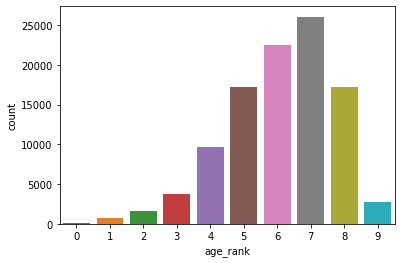

In [0]:
sns.countplot(df2['age_rank'])

In [0]:
df_num = df2.select_dtypes(include='number').copy()

In [0]:
df_num.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted_binary,age_rank
0,6.0,25.0,1.0,1.0,41.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
1,1.0,1.0,7.0,3.0,59.0,0.0,18.0,0.0,0.0,0.0,9.0,1,1
2,1.0,1.0,7.0,2.0,11.0,5.0,13.0,2.0,0.0,1.0,6.0,0,2
3,1.0,1.0,7.0,2.0,44.0,1.0,16.0,0.0,0.0,0.0,7.0,0,3
4,1.0,1.0,7.0,1.0,51.0,0.0,8.0,0.0,0.0,0.0,5.0,0,4


In [0]:
df_num.drop(['admission_type_id','discharge_disposition_id','admission_source_id','readmitted_binary','age_rank'], axis=1, inplace=True);

In [0]:
df_num.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,1.0,41.0,0.0,1.0,0.0,0.0,0.0,1.0
1,3.0,59.0,0.0,18.0,0.0,0.0,0.0,9.0
2,2.0,11.0,5.0,13.0,2.0,0.0,1.0,6.0
3,2.0,44.0,1.0,16.0,0.0,0.0,0.0,7.0
4,1.0,51.0,0.0,8.0,0.0,0.0,0.0,5.0


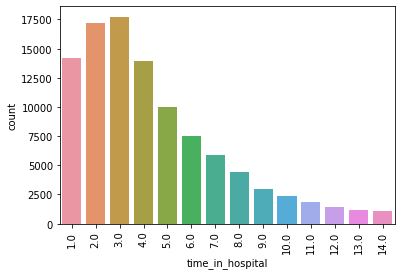

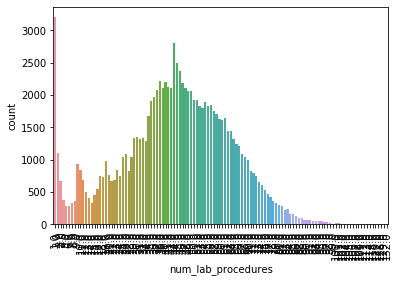

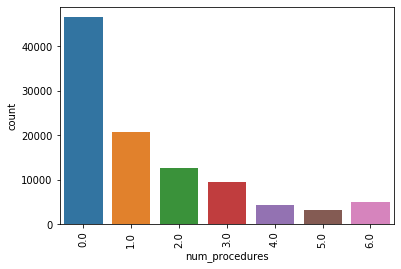

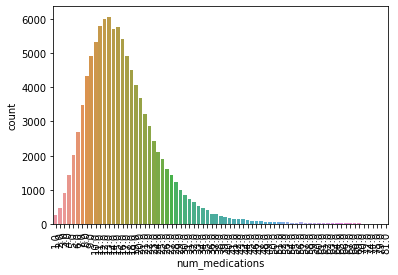

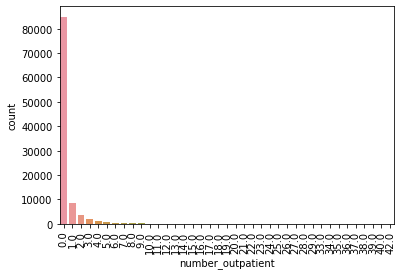

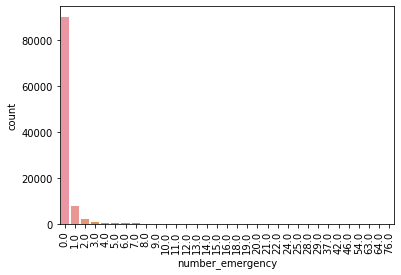

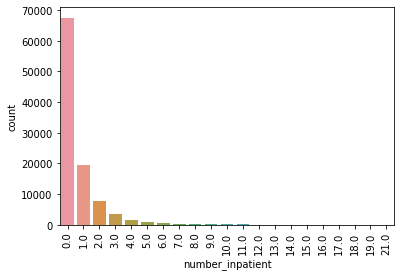

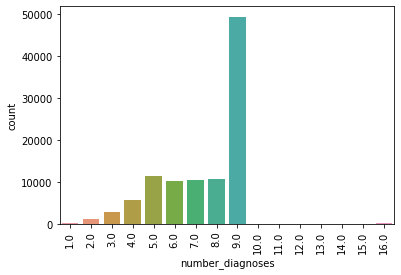

In [0]:
for name in df_num.columns:
    sns.countplot(df_num[name])
    plt.xticks(rotation=90)
    plt.show()
    

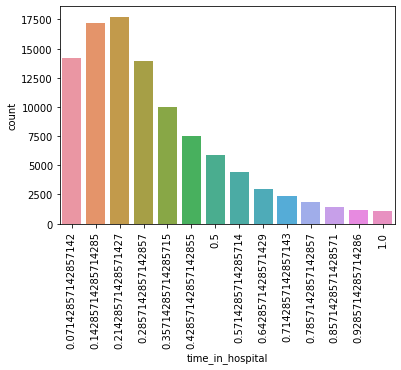

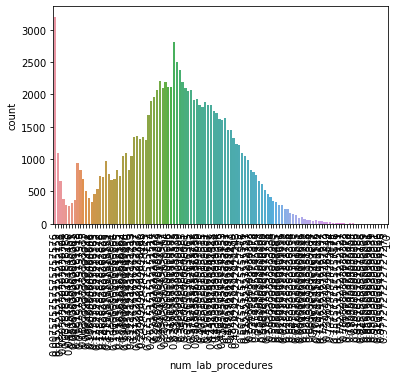

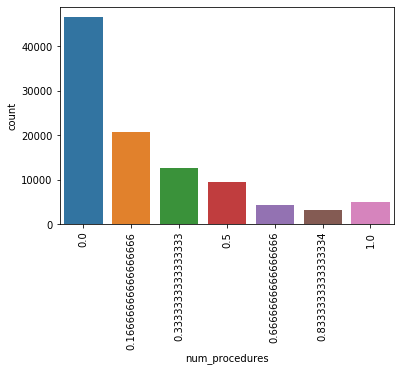

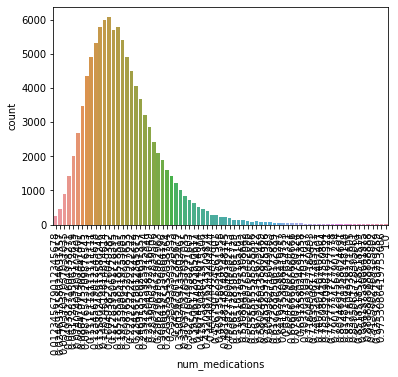

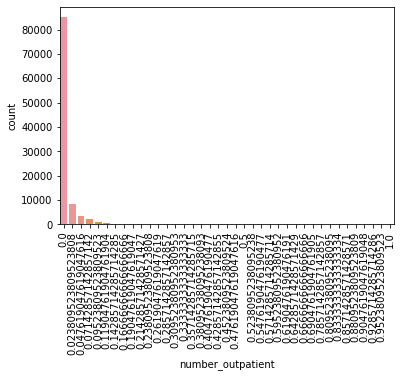

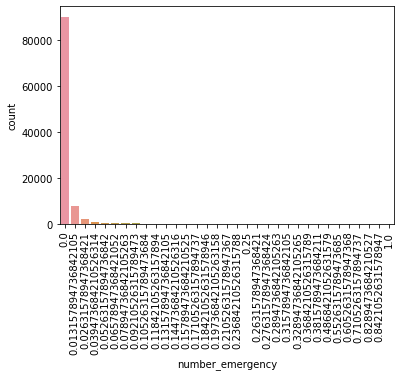

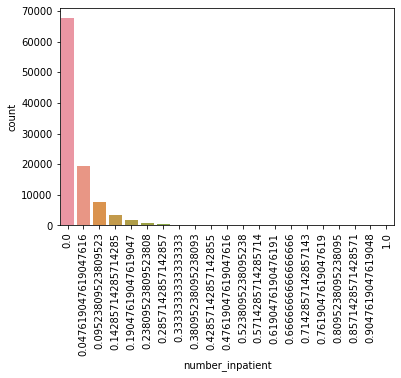

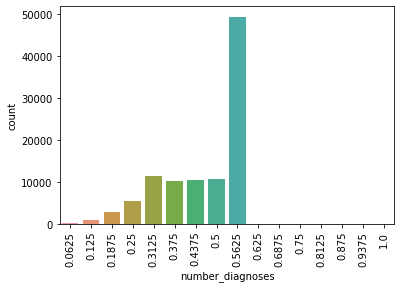

In [0]:
# scale to max
for name in df_num.columns:
    sns.countplot(df_num[name]/df_num[name].max()  )
    plt.xticks(rotation =90)
    plt.show()

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler= StandardScaler()

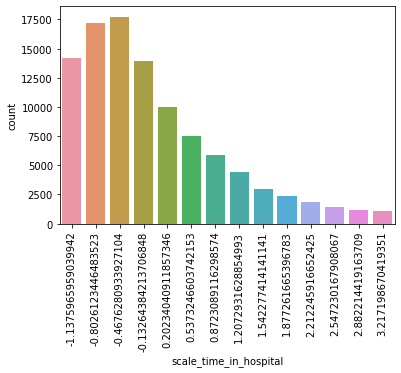

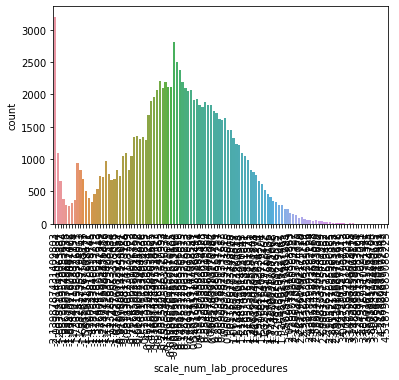

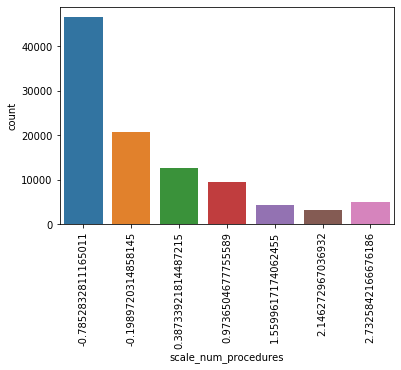

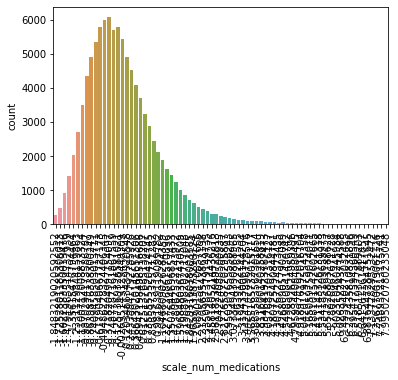

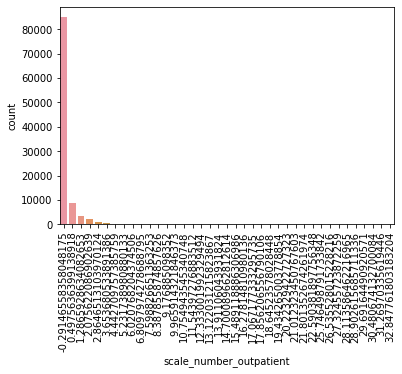

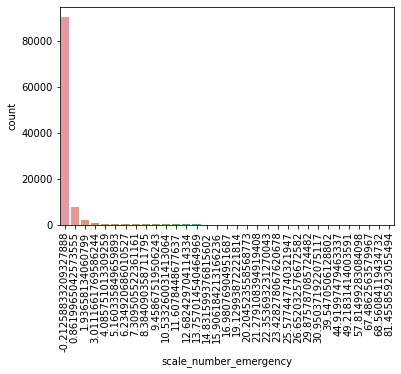

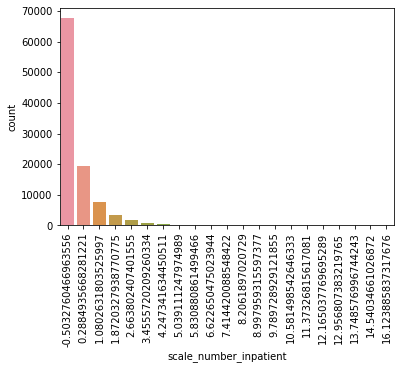

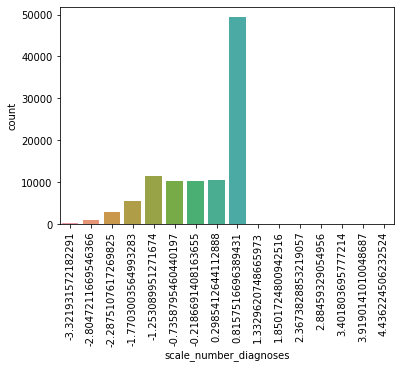

In [0]:
for name in df_num.columns:
    df_num['scale_'+name]=scaler.fit_transform(df_num[[name]])
    sns.countplot(df_num['scale_'+name])
    plt.xticks(rotation =90)
    plt.show()

## Combining two problematic features

Number of diagnoses and age group

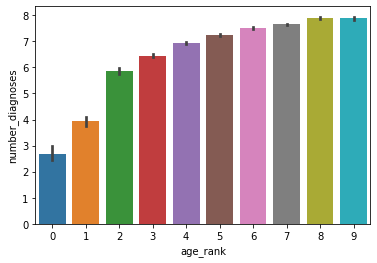

In [0]:
sns.barplot(data = df2, x= 'age_rank', y= 'number_diagnoses')

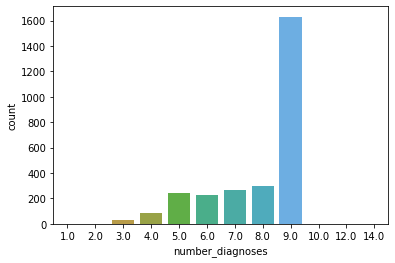

In [0]:
#Frequency of number of diagnoses for age group 9
sns.countplot(df2.loc[df2['age_rank']==9, 'number_diagnoses'])

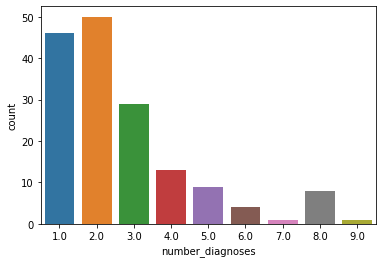

In [0]:
#Frequency of number of diagnoses for age group 0
sns.countplot(df2.loc[df2['age_rank']==0, 'number_diagnoses'])

In [0]:
df2.corr()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted_binary,age_rank
admission_type_id,1.000000,0.083587,0.106480,-0.012382,-0.143587,0.129716,0.079470,0.026507,-0.019148,-0.038192,-0.116980,-0.004928,-0.007232
discharge_disposition_id,0.083587,1.000000,0.018059,0.162870,0.023481,0.016092,0.108763,-0.008727,-0.024461,0.020858,0.046848,-0.014789,0.114331
admission_source_id,0.106480,0.018059,1.000000,-0.007036,0.049100,-0.135633,-0.054484,0.027483,0.059796,0.036067,0.072086,0.040146,0.044502
time_in_hospital,-0.012382,0.162870,-0.007036,1.000000,0.318562,0.191493,0.466244,-0.009075,-0.009691,0.073649,0.220232,0.051379,0.107599
num_lab_procedures,-0.143587,0.023481,0.049100,0.318562,1.000000,0.058060,0.268293,-0.007591,-0.002041,0.039264,0.152993,0.039336,0.020867
num_procedures,0.129716,0.016092,-0.135633,0.191493,0.058060,1.000000,0.385653,-0.024896,-0.038262,-0.066314,0.073662,-0.044750,-0.030011
num_medications,0.079470,0.108763,-0.054484,0.466244,0.268293,0.385653,1.000000,0.045134,0.013219,0.064240,0.261474,0.046853,0.041793
number_outpatient,0.026507,-0.008727,0.027483,-0.009075,-0.007591,-0.024896,0.045134,1.000000,0.091603,0.107269,0.094269,0.082127,0.023740
number_emergency,-0.019148,-0.024461,0.059796,-0.009691,-0.002041,-0.038262,0.013219,0.091603,1.000000,0.266494,0.055539,0.102986,-0.087251
number_inpatient,-0.038192,0.020858,0.036067,0.073649,0.039264,-0.066314,0.064240,0.107269,0.266494,1.000000,0.104528,0.217163,-0.042885


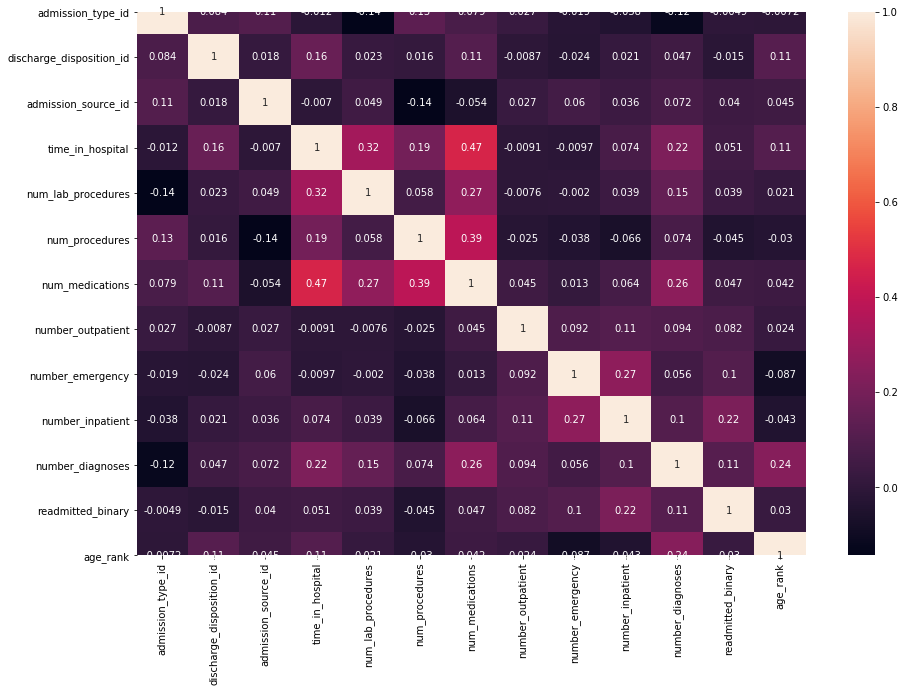

In [0]:
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(),annot=True)

In [0]:
from sklearn.feature_selection import SelectKBest, f_classif

In [0]:
df2.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'readmitted_binary', 'age_rank'],
      dtype='object')

In [0]:
df2 = df2.fillna(0)
Y=df2['readmitted_binary']
X=df2.drop(columns=['race', 'gender', 'age','diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted','readmitted_binary'], axis=1)

In [0]:
k  = 5
kbest = SelectKBest(k=k, score_func= f_classif)
X_best_feature = kbest.fit_transform(X,Y)


In [0]:
X_best_feature = pd.DataFrame(X_best_feature, columns = X.columns[kbest.get_support()])

In [0]:
X_best_feature.columns

Index(['time_in_hospital', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient'],
      dtype='object')

In [0]:
X_best_feature.head()

,time_in_hospital,num_medications,number_outpatient,number_emergency,number_inpatient
0,1.0,1.0,0.0,0.0,0.0
1,3.0,18.0,0.0,0.0,0.0
2,2.0,13.0,2.0,0.0,1.0
3,2.0,16.0,0.0,0.0,0.0
4,1.0,8.0,0.0,0.0,0.0


In [0]:
kbest.scores_

array([2.47100868e+00, 2.23379352e+01, 1.64025677e+02, 2.67791302e+02,
       1.58105199e+02, 2.03071037e+02, 2.20921854e+02, 6.90989670e+02,
       1.09061344e+03, 5.03566609e+03, 9.41519557e+01])

In [0]:
pd.Series(kbest.scores_, index=X.columns)

admission_type_id              2.471009
discharge_disposition_id      22.337935
admission_source_id          164.025677
time_in_hospital             267.791302
num_lab_procedures           158.105199
num_procedures               203.071037
num_medications              220.921854
number_outpatient            690.989670
number_emergency            1090.613438
number_inpatient            5035.666085
age_rank                      94.151956
dtype: float64

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components =11)
X_pca =pca.fit_transform(X)
cov = np.cov(X_pca.T)

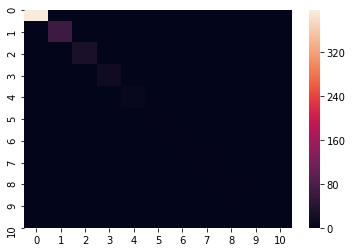

In [0]:
sns.heatmap(cov)

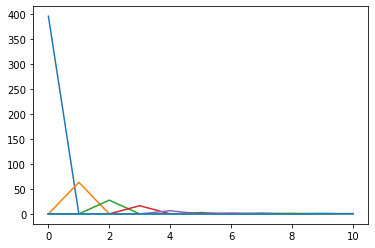

In [0]:
plt.plot(cov);

# Model performance
* Go back to your diabetes data set, and create a logistic regression model

* Evaluate your model, using cross validation and train-test splitting

* Use each of the metrics we went over

* Create a confusion matrix and an ROC curve

* Vary your hyperparameters and see the results on your metrics


In [0]:
# all imports in one place for convenience
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups_vectorized
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
%matplotlib inline

In [0]:
df2.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_binary,age_rank
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,41.0,0.0,1.0,0.0,0.0,0.0,250.83,0,0,1.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0,0
1,Caucasian,Female,[10-20),1.0,1.0,7.0,3.0,59.0,0.0,18.0,0.0,0.0,0.0,276,250.01,255,9.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,1,1
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,2.0,11.0,5.0,13.0,2.0,0.0,1.0,648,250,V27,6.0,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,0,2
3,Caucasian,Male,[30-40),1.0,1.0,7.0,2.0,44.0,1.0,16.0,0.0,0.0,0.0,8,250.43,403,7.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,0,3
4,Caucasian,Male,[40-50),1.0,1.0,7.0,1.0,51.0,0.0,8.0,0.0,0.0,0.0,197,157,250,5.0,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,0,4


In [0]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']


In [0]:
y = df2['readmitted_binary']
X=df2
X.drop(['readmitted_binary','admission_type_id','discharge_disposition_id','admission_source_id'],axis=1)
X= X.select_dtypes(include=numerics)
X1 = df2[X_best_feature.columns]

In [0]:
X_train, X_test, y_train, y_test  =  train_test_split(X1, y, random_state = 1)

In [0]:
lr = LogisticRegression(solver='sag', penalty = 'l2')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)


0.6162644446191338

In [0]:
X_train.shape, y_test.shape

((76324, 5), (25442,))

In [0]:
predictions = lr.predict(X_test)

confusion = confusion_matrix(y_test, predictions, labels=[1, 0])
print(confusion)

[[ 4009  7607]
 [ 2156 11670]]


In [0]:
df2['glimepiride-pioglitazone'].unique()

array(['No', 'Steady'], dtype=object)

In [0]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X_train, y_train)

lr_score = lr.score(X_test, y_test)
lr_predictions = lr.predict(X_test)

print('Accuracy of Logistic Regression: {:.3f}'.format(lr_score))

Accuracy of Logistic Regression: 0.616


In [0]:
lr_regularized = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000)
lr_regularized.fit(X_train, y_train)

test_score = lr_regularized.score(X_test, y_test)
train_score = lr_regularized.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  0.6091530842199047
Score on test data:  0.6162644446191338


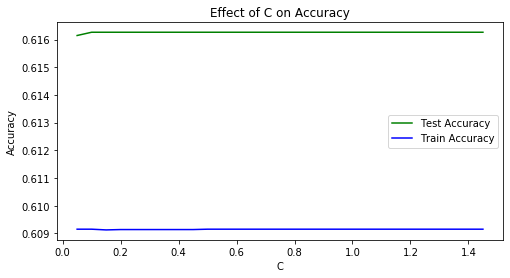

In [0]:
c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
  lr = LogisticRegression(solver='lbfgs', penalty='l2', C=c, max_iter=10000)
  lr.fit(X_train, y_train)
  test_accuracy.append(lr.score(X_test, y_test))
  train_accuracy.append(lr.score(X_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', label='Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', label='Train Accuracy')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()

In [0]:
dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.543432120116343

#Confusion Matrix

In [0]:

predictions = lr.predict(X_test)

confusion = confusion_matrix(y_test, predictions, labels=[1, 0])
print(confusion)

[[ 4009  7607]
 [ 2156 11670]]


In [0]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

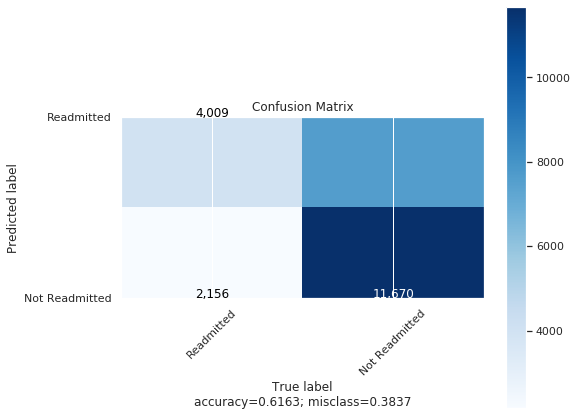

In [0]:
plot_confusion_matrix(cm=confusion, target_names = ['Readmitted', 'Not Readmitted'], title = 'Confusion Matrix',normalize=False)
sns.set()

In [0]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, 0.5)
fbeta_recall = fbeta_score(y_test, predictions, 2)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Accuracy score: 0.62
Precision score: 0.65
Recall score: 0.35
F1 score: 0.45
Fbeta score favoring precision: 0.55
FBeta score favoring recall: 0.38


In [0]:
report = classification_report(y_test, predictions, target_names=['Not Readmitted', 'Readmitted'])
print(report)

                precision    recall  f1-score   support

Not Readmitted       0.61      0.84      0.71     13826
    Readmitted       0.65      0.35      0.45     11616

      accuracy                           0.62     25442
     macro avg       0.63      0.59      0.58     25442
  weighted avg       0.63      0.62      0.59     25442



In [0]:
dummy_report = classification_report(y_test, dummy.predict(X_test), target_names=['Not Readmitted', 'Readmitted'])
print(dummy_report)

                precision    recall  f1-score   support

Not Readmitted       0.54      1.00      0.70     13826
    Readmitted       0.00      0.00      0.00     11616

      accuracy                           0.54     25442
     macro avg       0.27      0.50      0.35     25442
  weighted avg       0.30      0.54      0.38     25442



#Decision Function - Varying the Probability Threshold

In [0]:
probs = lr.predict_proba(X_test)[:, 1]
print(probs[1:30])

[0.46904425 0.61208775 0.37512253 0.47945254 0.36504045 0.57468723
 0.63414216 0.40448926 0.38019637 0.78472408 0.41608136 0.58494451
 0.48290785 0.38675839 0.3860272  0.36790449 0.39155002 0.75697111
 0.49698448 0.41420037 0.47866436 0.37584572 0.58945055 0.41737827
 0.38711537 0.62369774 0.40933597 0.67593693 0.38202364]


findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


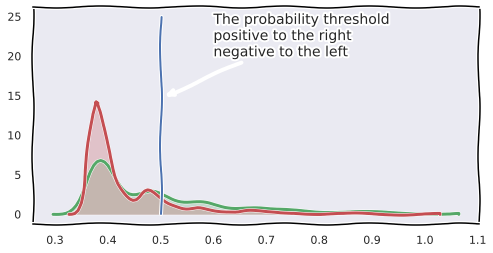

In [0]:
pos = [i for i, j in zip(probs, y_test) if j == 1]
neg = [i for i, j in zip(probs, y_test) if j == 0]

with plt.xkcd():
  fig = plt.figure(figsize=(8, 4))

  sns.distplot(pos, hist = False, kde = True, color='g',
                 kde_kws = {'shade': True, 'linewidth': 3})

  sns.distplot(neg, hist = False, kde = True, color='r',
                 kde_kws = {'shade': True, 'linewidth': 3})

  plt.plot([0.5, 0.5], [0, 25], '-b')
  plt.annotate(
        'The probability threshold\npositive to the right\nnegative to the left',
        xy=(0.51, 15), arrowprops=dict(arrowstyle='->'), xytext=(0.6, 20))

plt.show()

In [0]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
print(fpr[1:30])
print(tpr[1:30])
print(thresholds[1:30])

[0.00000000e+00 0.00000000e+00 7.23274989e-05 7.23274989e-05
 1.44654998e-04 1.44654998e-04 2.16982497e-04 2.16982497e-04
 2.89309996e-04 2.89309996e-04 3.61637495e-04 3.61637495e-04
 4.33964993e-04 4.33964993e-04 5.06292492e-04 5.06292492e-04
 5.78619991e-04 5.78619991e-04 6.50947490e-04 6.50947490e-04
 7.23274989e-04 7.23274989e-04 7.95602488e-04 7.95602488e-04
 8.67929987e-04 8.67929987e-04 8.67929987e-04 8.67929987e-04
 9.40257486e-04]
[8.60881543e-05 1.29132231e-03 1.29132231e-03 1.98002755e-03
 1.98002755e-03 2.32438017e-03 2.32438017e-03 4.64876033e-03
 4.64876033e-03 5.76790634e-03 5.76790634e-03 5.85399449e-03
 5.85399449e-03 6.02617080e-03 6.02617080e-03 6.28443526e-03
 6.28443526e-03 6.37052342e-03 6.37052342e-03 6.54269972e-03
 6.54269972e-03 7.74793388e-03 7.74793388e-03 8.35055096e-03
 8.35055096e-03 8.52272727e-03 8.69490358e-03 1.06749311e-02
 1.06749311e-02]
[0.99999986 0.99729291 0.99705365 0.99519688 0.99511752 0.99447975
 0.99446778 0.98474511 0.98465619 0.97908266 

#ROC curve

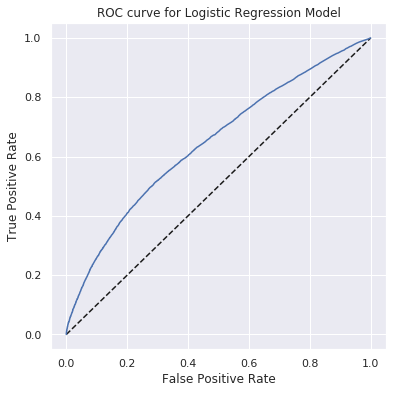

In [0]:
fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression Model')
plt.show()

#Precision-Recall Curve

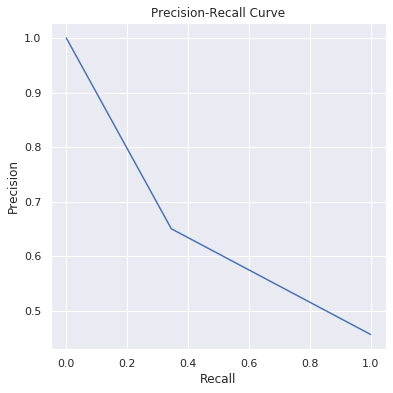

In [0]:
pres, rec, thresholds = precision_recall_curve(y_test, predictions)
fig = plt.figure(figsize = (6, 6))
plt.plot(rec, pres)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

#Area under the ROC curve (AUC)

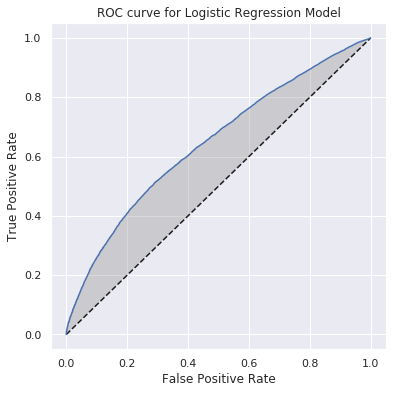

In [0]:
fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.fill(fpr, tpr, 'grey', alpha=0.3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression Model')
plt.show()